In [1]:
import TADselect

/home/dmitry/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


DEBUG:matplotlib:CACHEDIR=/home/dmitry/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/dmitry/.cache/matplotlib/fontList.json
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


# What is Experiment?

The `Experiment` class is designed to integrate `CallerClasses`, `InteractionMatrix`, `GenomicRanges`, data input/output and visualisation during TAD caller parameter selection. The class attributes are fully customisable so you are able to infulence parameter selection proccess.

|Strategy|Strategy name|Labels|Matrices|Track file|
|--------|-------------|------|--------|----------|
|Simulation fitting|simulated|one label|one matrix|File with genomic ranges in 2-column or BED-like format|
|Convergence between technical replica|convergence|two labels of the following type: 'code_rep1' and 'code_rep2'|two matrices|No track file|
|Distance to genomic features|border_events|one label|one matrix|Genomic track file in BED-like format|
|Fitting average TAD size|fitting-average|one label|one matrix|No|

The names of caller classes can be seen in the following dictionary:

In [18]:
for key, val in TADselect.ExperimentClass.caller_dict.items():
    print(key, val, sep='\t')

mrtadfinder	<class 'TADselect.CallerClasses.MrTADFinderCaller'>
hicseg	<class 'TADselect.CallerClasses.HiCsegCaller'>
lavacorner	functools.partial(<class 'TADselect.CallerClasses.LavaburstCaller'>, method='corner')
hicseg_g	functools.partial(<class 'TADselect.CallerClasses.HiCsegCaller'>, distr_model='G')
lavamodularity	functools.partial(<class 'TADselect.CallerClasses.LavaburstCaller'>, method='modularity')
armatus	<class 'TADselect.CallerClasses.ArmatusCaller'>
hicseg_p	functools.partial(<class 'TADselect.CallerClasses.HiCsegCaller'>, distr_model='P')
directionality	<class 'TADselect.CallerClasses.DirectionalityCaller'>
hicexplorer	<class 'TADselect.CallerClasses.HiCExplorerCaller'>
lavaarmatus	functools.partial(<class 'TADselect.CallerClasses.LavaburstCaller'>, method='armatus')
lavaburst	<class 'TADselect.CallerClasses.LavaburstCaller'>
hicseg_b	functools.partial(<class 'TADselect.CallerClasses.HiCsegCaller'>, distr_model='B')
lavavariance	functools.partial(<class 'TADselect.Caller

In [2]:
sim_exp = TADselect.Experiment(datasets_labels=['Sim_rep1'], datasets_files=['../example_data/test_mtx.cool'],
                               data_format='cool', chr='Sim', callername='lavaarmatus', resolution=1,
                               optimisation='simulated', track_file='../example_data/test_TADs.txt',
                               balance=False)

DEBUG:TADselect:Initializing from files: ['../example_data/test_mtx.cool']


Many attributes from object initialisation are stored in object attributes.

In [4]:
sim_exp.background_method

'size'

In [5]:
sim_exp.optimisation

'simulated'

In [6]:
sim_exp.callername

'lavaarmatus'

In [7]:
sim_exp.track

0	15	1
15	33	1
33	39	1
39	44	1
44	52	1
52	62	1
62	79	1
79	82	1
82	96	1
96	105	1
105	122	1
122	132	1
132	141	1
141	154	1
154	164	1
164	180	1
180	198	1
198	209	1
209	213	1
213	219	1
219	232	1
232	244	1
244	255	1
255	265	1
265	278	1
278	285	1
285	297	1
297	303	1
303	317	1
317	327	1
327	347	1
347	358	1
358	377	1
377	388	1
388	393	1
393	413	1
413	420	1
420	429	1
429	446	1
446	460	1
460	480	1
480	498	1
498	502	1
502	512	1
512	519	1
519	539	1
539	558	1
558	564	1
564	574	1
574	587	1
587	592	1
592	595	1
595	602	1
602	611	1
611	624	1
624	636	1
636	650	1
650	667	1
667	683	1
683	698	1
698	710	1
710	728	1
728	738	1
738	743	1
743	759	1
759	766	1
766	773	1
773	783	1
783	792	1
792	800	1
800	808	1
808	815	1
815	833	1
833	848	1
848	851	1
851	867	1
867	880	1
880	891	1
891	904	1
904	911	1
911	916	1
916	930	1
930	941	1
941	961	1
961	981	1
981	984	1
984	994	1
994	999	1

You can access the underlying `CallerClasses` instance via `.caller` with all its attributes.

In [9]:
sim_exp.caller

## Tuning Experiment parameters

You are able to fine-tune several parameters used for parameter selection:
* cutoffs for background method and average TAD size for fitting-average strategy via `self.profile`
* initial ranges of parameter via `self.history`
* scale factors for making next range of parameter values via `self.scale_factors`

In [12]:
sim_exp.profile

{'dispersion': [0.05, 0.95], 'midpoint': 500000.0, 'size': [2, 100]}

History contains data about all ranges of parameters used for TAD calling as well as number of current iteration and value of best_gamma.

In [13]:
sim_exp.history

{'best_func': [],
 'best_gamma': [],
 'iteration': 0,
 'ranges': [gamma    [-5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1....
  dtype: object]}

The parameter range is a `pd.Series` instance with indices named as parameters for respecting TAD caller.

In [3]:
sim_exp.history['ranges'][-1]

gamma    [-5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1....
dtype: object

Default ranges are defined inside the `Experiment` class:

In [23]:
sim_exp.default_ranges

{'armatus': gamma    [-5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1....
 dtype: object,
 'arrowhead': windowSize    [0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.2...
 dtype: object,
 'directionality': window    [1, 11, 21, 31, 41, 51, 61, 71, 81, 91]
 cutoff                       [0.1, 0.2, 0.5, 0.7]
 dtype: object,
 'hicexplorer': minDepth    [2, 3, 4, 5, 6, 7]
 maxDepth    [4, 5, 6, 7, 8, 9]
 dtype: object,
 'hicseg': None,
 'insulation': window    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
 cutoff               [0.1, 0.2, 0.5, 0.7]
 dtype: object,
 'lavaarmatus': gamma    [-5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1....
 dtype: object,
 'lavaburst': gamma    [-5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1....
 dtype: object,
 'lavacorner': gamma    [-5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1....
 dtype: object,
 'lavamodularity': gamma    [5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, ...
 dtype: object,
 'lavavariance': gamma    [-5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1....
 dtype: object,

`.scale_factors` contain 3 parametes for generating new range based on the current one. `wide` defines how many values will be spanned from the maximum coordinate in case maximum of optimisation function is close to the left or to the right border. `narrow` defines the same value but in case maximum of optimisation function is found somewhere inside the current parameter range. `factor` defines scale by which the current step will be divided in case of `narrow`.

In [15]:
sim_exp.scale_factors

{'factor': 5, 'narrow': 2, 'wide': 5}

Default scale factors for selected callers can be seen taken from the following dictionary:

In [19]:
for key, val in TADselect.ExperimentClass.set_scale_factors.items():
    print(key, val, sep='\t')

lavaarmatus	{'narrow': 2, 'factor': 5, 'wide': 5}
lavaburst	{'narrow': 2, 'factor': 5, 'wide': 5}
lavamodularity	{'narrow': 2, 'factor': 5, 'wide': 5}
armatus	{'narrow': 2, 'factor': 5, 'wide': 5}
directionality	{'narrow': 1, 'factor': 4, 'wide': 3}
insulation	{'narrow': 2, 'factor': 5, 'wide': 5}


## Iterative approach for TAD caller parameter selection

The main method of Experiment with TAD callers containing master parameter is `.iterative_approach()`. You can define several parameters for stopping iterative parameter selection:

|argument|function|default value|
|--------|--------|-------------|
|iterations|if number of iterations exceeds given number, then selection stops|5|
|threshold|if the step or parameter range falls behind given value, then selection stops|0.01|
|cutoff|if the best value of optimisation function exceeds given value, then selection stops|0.95|
|offset|the offset used for calculating optimisation functions (see `GenomicRanges` examples)|0|
|bgn|the first bin of matrix to be plotted in heatmap|0|
|end|the last bin of matrix to be plotted in heatmap|250|
|filename|filename for resulting plot to be saved|None (plots on the screen)|

DEBUG:TADselect:Calling LavaburstCaller with params: gamma    [-5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1....
dtype: object
INFO:TADselect:NaNs filling with 0.00
0.022727272727272596 3.3295454545454555 18.900000000000002 (21,)
best gamma value is: (0.0,)
new range is:
gamma    [-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0....
dtype: object
DEBUG:TADselect:Calling LavaburstCaller with params: gamma    [-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0....
dtype: object
INFO:TADselect:NaNs filling with 0.00
-0.2215909090909091 12.590909090909092 18.900000000000002 (21,)
best gamma value is: (-0.1,)
new range is:
gamma    [-0.3, -0.28, -0.26, -0.24, -0.22, -0.2, -0.18...
dtype: object
DEBUG:TADselect:Calling LavaburstCaller with params: gamma    [-0.3, -0.28, -0.26, -0.24, -0.22, -0.2, -0.18...
dtype: object
INFO:TADselect:NaNs filling with 0.00


0.0 18.511363636363637 18.900000000000002 (21,)
best gamma value is: (-0.08,)
new range is:
gamma    [-0.12, -0.116, -0.112, -0.108, -0.104, -0.1, ...
dtype: object
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


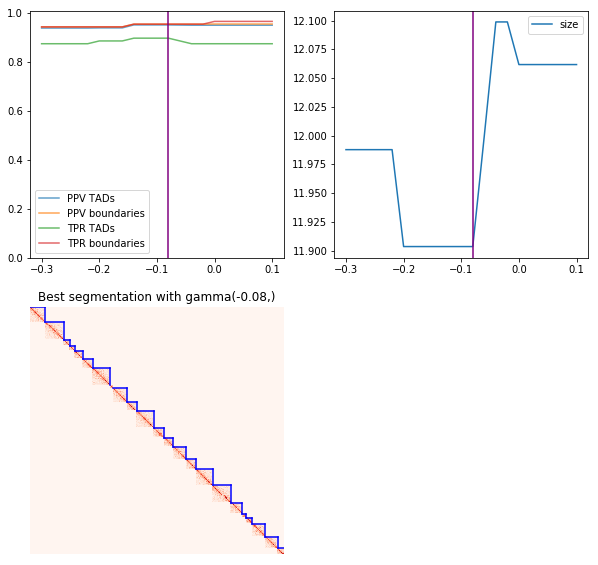

In [3]:
sim_exp.iterative_approach(iterations=3, threshold=0.01, cutoff=0.99, offset=0)

After parameter selection, 3 plots are made: values of optimisation functions in the last range of parameters, average TAD size in bins and heatmap of segmentation with the best TAD segmentation.

You can also obtain all resulting information in respecting objects:
* optimisation data: `self.optimisation_data` dataframe;
* background data: `self.background_data` dataframe;
* best parameter value over iterations: `self.history['best_gamma']`;
* segmentations: `self.caller._segmentations`.

In [6]:
sim_exp.history['best_gamma']

[(0.0,), (-0.1,), (-0.08,)]

Note that all dataframes contain MultiIndex. This means each row is defined as combination of label and parameter value.

In [7]:
sim_exp.optimisation_data

PPV TADs  PPV boundaries  TPR TADs  TPR boundaries
label    gamma1                                                    
Sim_rep1 -5.00   0.000000        0.666667  0.000000        0.022472
         -4.50   0.000000        0.333333  0.000000        0.011236
         -4.00   0.000000        0.333333  0.000000        0.011236
         -3.50   0.625000        0.800000  0.056818        0.089888
         -3.00   0.500000        0.818182  0.056818        0.101124
         -2.50   0.642857        0.812500  0.102273        0.146067
         -2.00   0.600000        0.941176  0.102273        0.179775
         -1.50   0.689655        0.906250  0.227273        0.325843
         -1.00   0.783784        0.902439  0.329545        0.415730
         -0.50   0.890625        0.956522  0.647727        0.741573
          0.00   0.950617        0.955556  0.875000        0.966292
          0.50   0.626506        0.711864  0.590909        0.943820
          1.00   0.146341        0.395833  0.136364        0.640449
          1.50   0.063492        0.300813  0.045455        0.415730
          2.00   0.037037        0.221154  0.022727        0.258427
          2.50   0.045455        0.255814  0.022727        0.247191
          3.00   0.050000        0.269231  0.022727        0.235955
          3.50   0.057143        0.246377  0.022727        0.191011
          4.00   0.052632        0.253333  0.022727        0.213483
          4.50   0.054054        0.260274  0.022727        0.213483
          5.00   0.054054        0.260274  0.022727        0.213483
         -0.90   0.775000        0.906977  0.352273        0.438202
         -0.80   0.800000        0.924528  0.454545        0.550562
         -0.70   0.833333        0.931034  0.511364        0.606742
         -0.60   0.838710        0.940299  0.590909        0.707865
         -0.40   0.912500        0.942529  0.829545        0.921348
         -0.30   0.939024        0.943820  0.875000        0.943820
         -0.20   0.939759        0.943820  0.886364        0.943820
         -0.10   0.951807        0.955056  0.897727        0.955056
          0.10   0.950617        0.955556  0.875000        0.966292
          0.20   0.925926        0.934783  0.852273        0.966292
          0.30   0.864198        0.886598  0.795455        0.966292
          0.40   0.756098        0.807692  0.704545        0.943820
          0.60   0.517647        0.661290  0.500000        0.921348
          0.70   0.428571        0.592000  0.409091        0.831461
          0.80   0.280488        0.500000  0.261364        0.741573
          0.90   0.240506        0.463235  0.215909        0.707865
         -0.28   0.939024        0.943820  0.875000        0.943820
         -0.26   0.939024        0.943820  0.875000        0.943820
         -0.24   0.939024        0.943820  0.875000        0.943820
         -0.22   0.939024        0.943820  0.875000        0.943820
         -0.18   0.939759        0.943820  0.886364        0.943820
         -0.16   0.939759        0.943820  0.886364        0.943820
         -0.14   0.951807        0.955056  0.897727        0.955056
         -0.12   0.951807        0.955056  0.897727        0.955056
         -0.08   0.951807        0.955056  0.897727        0.955056
         -0.06   0.951220        0.955056  0.886364        0.955056
         -0.04   0.950617        0.955056  0.875000        0.955056
         -0.02   0.950617        0.955056  0.875000        0.955056
          0.02   0.950617        0.955556  0.875000        0.966292
          0.04   0.950617        0.955556  0.875000        0.966292
          0.06   0.950617        0.955556  0.875000        0.966292
          0.08   0.950617        0.955556  0.875000        0.966292

In [11]:
sim_exp.background_data

size
label    gamma1            
Sim_rep1 -5.00   500.000000
         -4.50   500.000000
         -4.00   500.000000
         -3.50   124.875000
         -3.00   100.000000
         -2.50    71.357143
         -2.00    66.466667
         -1.50    34.379310
         -1.00    26.837838
         -0.50    15.453125
          0.00    12.061728
          0.50    10.903614
          1.00     7.085366
          1.50     6.269841
          2.00     5.259259
          2.50     5.272727
          3.00     5.125000
          3.50     5.285714
          4.00     5.210526
          4.50     5.135135
          5.00     5.108108
         -0.90    24.875000
         -0.80    19.900000
         -0.70    18.370370
         -0.60    15.951613
         -0.40    12.287500
         -0.30    11.987805
         -0.20    11.903614
         -0.10    11.903614
          0.10    12.061728
          0.20    11.962963
          0.30    11.827160
          0.40    11.500000
          0.60    10.200000
          0.70     9.928571
          0.80     9.073171
          0.90     8.037975
         -0.28    11.987805
         -0.26    11.987805
         -0.24    11.987805
         -0.22    11.987805
         -0.18    11.903614
         -0.16    11.903614
         -0.14    11.903614
         -0.12    11.903614
         -0.08    11.903614
         -0.06    12.000000
         -0.04    12.098765
         -0.02    12.098765
          0.02    12.061728
          0.04    12.061728
          0.06    12.061728
          0.08    12.061728

To access one specific row, locate it with tuple.

In [15]:
sim_exp.optimisation_data.loc[('Sim_rep1', -5)]

PPV TADs          0.000000
PPV boundaries    0.666667
TPR TADs          0.000000
TPR boundaries    0.022472
Name: (Sim_rep1, -5.0), dtype: float64

You can plot all optimisation and background data you want as in `.iterative_approach()` with `Experiment.plot_one_dim()` (for 1-dim parameter TAD callers) or `Experiment.plot_two_dim()` (for n-dim parameter TAD callers) methods.

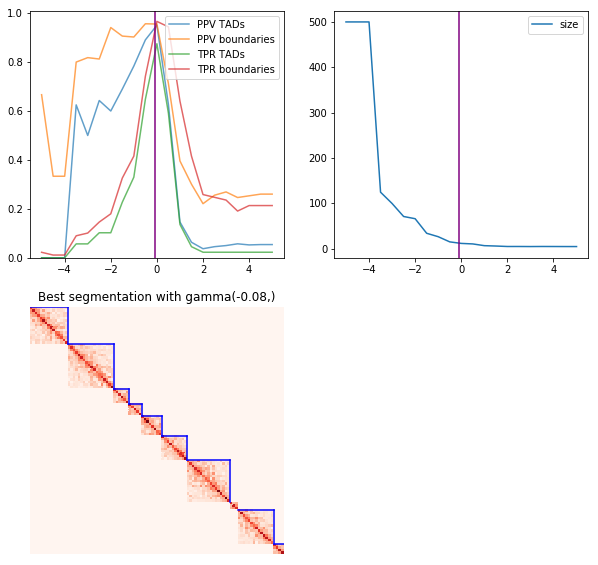

In [13]:
TADselect.Experiment.plot_one_dim(caller=sim_exp.caller,
                                  obtained_gamma_range=sim_exp.history['ranges'][0],
                                  optimisation_data=sim_exp.optimisation_data,
                                  background_data=sim_exp.background_data,
                                  best_gamma=sim_exp.history['best_gamma'][-1],
                                  bgn=0, end=100)

# Experiment for TAD callers with 2-dim parameter

In [2]:
sim_exp = TADselect.Experiment(datasets_labels=['Sim_rep1'], datasets_files=['../example_data/test_mtx.cool'],
                               data_format='cool', chr='Sim', callername='insulation', resolution=1,
                               optimisation='simulated', track_file='../example_data/test_TADs.txt',
                               balance=False)

DEBUG:TADselect:Initializing from files: ['../example_data/test_mtx.cool']


DEBUG:TADselect:Calling InsulationCaller with params: window    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
cutoff               [0.1, 0.2, 0.5, 0.7]
dtype: object
-0.15340909090909094 36.38636363636364 36.0 (10, 4)
best gamma value is: (2, 0.7)
new range is:
window                      [-4, -3, -2, -1, 0, 1, 2, 3, 4]
cutoff    [0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64,...
dtype: object
0 1 1.0 20
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
0 1 1.0 20
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
0 1 0.9090909090909091 20
0 1 0.9550561797752809 20


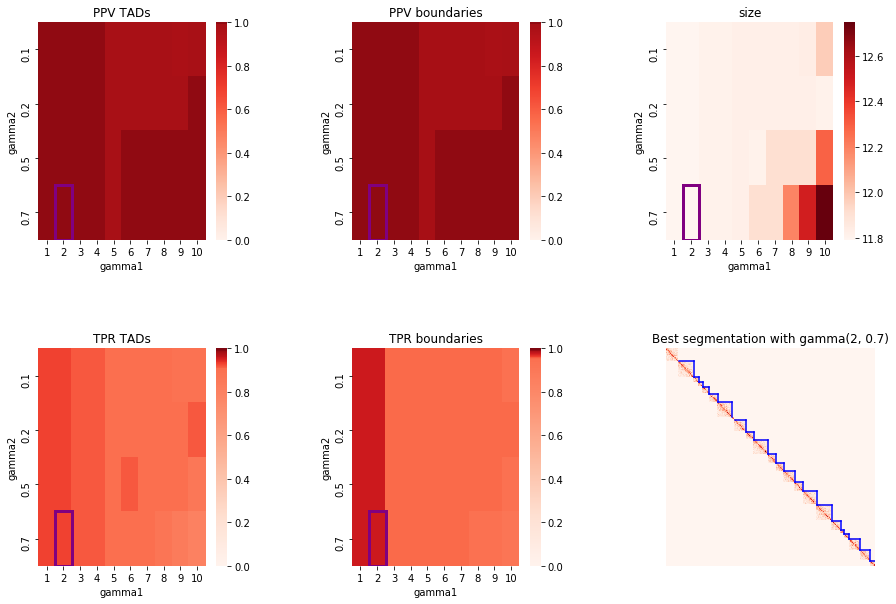

In [3]:
sim_exp.iterative_approach(iterations=5, threshold=0.01, cutoff=0.99, offset=0)

All n-dim parameter TAD callers build only 2D heatmaps based on the most important parameters. Dataframes store data in MultiIndex way as in 1-dim Experiment.

In [18]:
sim_exp.optimisation_data

PPV TADs  PPV boundaries  TPR TADs  TPR boundaries
label    gamma1 gamma2                                                    
Sim_rep1 1      0.1     1.000000        1.000000  0.931818        0.977528
                0.2     1.000000        1.000000  0.931818        0.977528
                0.5     1.000000        1.000000  0.931818        0.977528
                0.7     1.000000        1.000000  0.931818        0.977528
         2      0.1     1.000000        1.000000  0.931818        0.977528
                0.2     1.000000        1.000000  0.931818        0.977528
                0.5     1.000000        1.000000  0.931818        0.977528
                0.7     1.000000        1.000000  0.931818        0.977528
         3      0.1     1.000000        1.000000  0.920455        0.955056
                0.2     1.000000        1.000000  0.920455        0.955056
                0.5     1.000000        1.000000  0.920455        0.955056
                0.7     1.000000        1.000000  0.920455        0.955056
         4      0.1     1.000000        1.000000  0.920455        0.955056
                0.2     1.000000        1.000000  0.920455        0.955056
                0.5     1.000000        1.000000  0.920455        0.955056
                0.7     1.000000        1.000000  0.920455        0.955056
         5      0.1     0.987654        0.988372  0.909091        0.955056
                0.2     0.987654        0.988372  0.909091        0.955056
                0.5     0.987654        0.988372  0.909091        0.955056
                0.7     0.987654        0.988372  0.909091        0.955056
         6      0.1     0.987654        0.988372  0.909091        0.955056
                0.2     0.987654        0.988372  0.909091        0.955056
                0.5     1.000000        1.000000  0.920455        0.955056
                0.7     1.000000        1.000000  0.909091        0.955056
         7      0.1     0.987654        0.988372  0.909091        0.955056
                0.2     0.987654        0.988372  0.909091        0.955056
                0.5     1.000000        1.000000  0.909091        0.955056
                0.7     1.000000        1.000000  0.909091        0.955056
         8      0.1     0.987654        0.988372  0.909091        0.955056
                0.2     0.987654        0.988372  0.909091        0.955056
                0.5     1.000000        1.000000  0.909091        0.955056
                0.7     1.000000        1.000000  0.875000        0.943820
         9      0.1     0.975309        0.977011  0.897727        0.955056
                0.2     0.987654        0.988372  0.909091        0.955056
                0.5     1.000000        1.000000  0.909091        0.955056
                0.7     1.000000        1.000000  0.840909        0.943820
         10     0.1     0.987500        0.988235  0.897727        0.943820
                0.2     1.000000        1.000000  0.920455        0.955056
                0.5     1.000000        1.000000  0.863636        0.943820
                0.7     1.000000        1.000000  0.806818        0.921348